In [1]:
import pip
def import_or_install(package):
    try:
        __import__(package)
    except ImportError:
        pip.main(['install', package])   

import_or_install('importlib')
import_or_install('sys')
import_or_install('os')
import_or_install('pandas')
import_or_install('importlib')
import_or_install("numpy")
import_or_install("matplotlib")
import_or_install("sklearn")
import_or_install("pandas_market_calendars")
import_or_install("scipy")
import_or_install("datetime")
import_or_install("dateutil")
import_or_install("schedule")
import_or_install("patsy") 
import_or_install("stldecompose==0.0.5") 
import_or_install("statsmodels==0.10.2")
import_or_install("PyYAML==5.4.1")

import importlib
import sys
import os,sys
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: stldecompose==0.0.5 in c:\python38\lib\site-packages (0.0.5)

Requirement already satisfied: pandas in c:\python38\lib\site-packages (from stldecompose==0.0.5) (1.4.1)

Requirement already satisfied: matplotlib in c:\python38\lib\site-packages (from stldecompose==0.0.5) (3.5.1)

Requirement already satisfied: numpy in c:\python38\lib\site-packages (from stldecompose==0.0.5) (1.22.2)

Requirement already satisfied: scipy in c:\python38\lib\site-packages (from stldecompose==0.0.5) (1.7.3)

Requirement already satisfied: statsmodels in c:\python38\lib\site-packages (from stldecompose==0.0.5) (0.10.2)

Requirement already satisfied: cycler>=0.10 in c:\python38\lib\site-packages (from matplotlib->stldecompose==0.0.5) (0.11.0)

Requirement already satisfied: packaging>=20.0 in c:\python38\lib\site-packages (from matplotlib->stldecompose==0.0.5) (21.3)

Requirement already satisfied: pyparsing>=2.2.1 in c:\python38\lib\site-packages (from matplotlib->stldecompose==0.0.5) (3.0.6)

Requirement already satisfied: pillow>=6.2.0 in c:\python38\lib\site-packages (from matplotlib->stldecompose==0.0.5) (9.0.0)

Requirement already satisfied: fonttools>=4.22.0 in c:\python38\lib\site-packages (from matplotlib->stldecompose==0.0.5) (4.28.5)

Requirement already satisfied: kiwisolver>=1.0.1 in c:\python38\lib\site-packages (from matplotlib->stldecompose==0.0.5) (1.3.2)

Requirement already satisfied: python-dateutil>=2.7 in c:\users\daniel\appdata\roaming\python\python38\site-packages (from matplotlib->stldecompose==0.0.5) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in c:\python38\lib\site-packages (from pandas->stldecompose==0.0.5) (2021.3)

Requirement already satisfied: patsy>=0.4.0 in c:\python38\lib\site-packages (from statsmodels->stldecompose==0.0.5) (0.5.2)

Requirement already satisfied: six in c:\users\daniel\appdata\roaming\python\python38\site-packages (from patsy>=0.4.0->statsmodels->stldecompose==0.0.5) (1.16.0)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: statsmodels==0.10.2 in c:\python38\lib\site-packages (0.10.2)

Requirement already satisfied: patsy>=0.4.0 in c:\python38\lib\site-packages (from statsmodels==0.10.2) (0.5.2)

Requirement already satisfied: scipy>=0.18 in c:\python38\lib\site-packages (from statsmodels==0.10.2) (1.7.3)

Requirement already satisfied: numpy>=1.11 in c:\python38\lib\site-packages (from statsmodels==0.10.2) (1.22.2)

Requirement already satisfied: pandas>=0.19 in c:\python38\lib\site-packages (from statsmodels==0.10.2) (1.4.1)

Requirement already satisfied: pytz>=2020.1 in c:\python38\lib\site-packages (from pandas>=0.19->statsmodels==0.10.2) (2021.3)

Requirement already satisfied: python-dateutil>=2.8.1 in c:\users\daniel\appdata\roaming\python\python38\site-packages (from pandas>=0.19->statsmodels==0.10.2) (2.8.2)

Requirement already satisfied: six in c:\users\daniel\appdata\roaming\python\python38\site-packages (from patsy>=0.4.0->statsmodels==0.10.2) (1.16.0)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: PyYAML==5.4.1 in c:\python38\lib\site-packages (5.4.1)

In [2]:
import importlib
import numpy as np
import pandas as pd
import TradingStrategy as ts
import Common.ApiClient as ac
import MA.ExponentialMovingAverageStrategy as ema
import MA.SimpleMovingAverageStrategy as sma
import PaperTrader as pTrader

pd.options.mode.chained_assignment = None 
importlib.reload(ts)
importlib.reload(ac)
importlib.reload(ema)
importlib.reload(sma)

<module 'MA.SimpleMovingAverageStrategy' from 'd:\\UW\\EE 596\\stock-ml-mini-project\\src\\MA\\SimpleMovingAverageStrategy.py'>

# Please provide your API Key and Secret Key below before you execute 

In [3]:
Api_Key =''
Secret_Key=''
endpoint='https://paper-api.alpaca.markets'
client = ac.ApiClient(api_key_Id=Api_Key,api_key_secret=Secret_Key)

# EMA Based Machine Learning Model

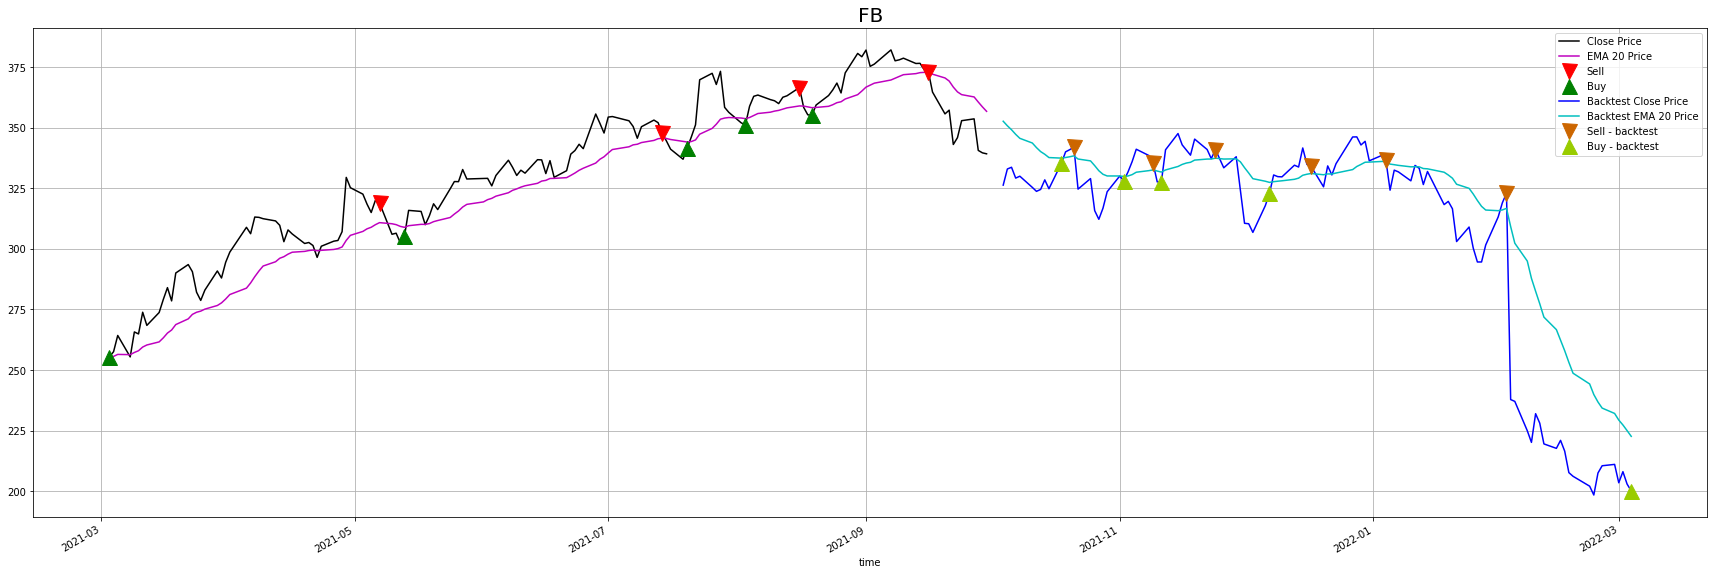

Buy and hold strategy returns for the backtest: -54.2%
EMA based model strategy returns for the backtest: 11.4%


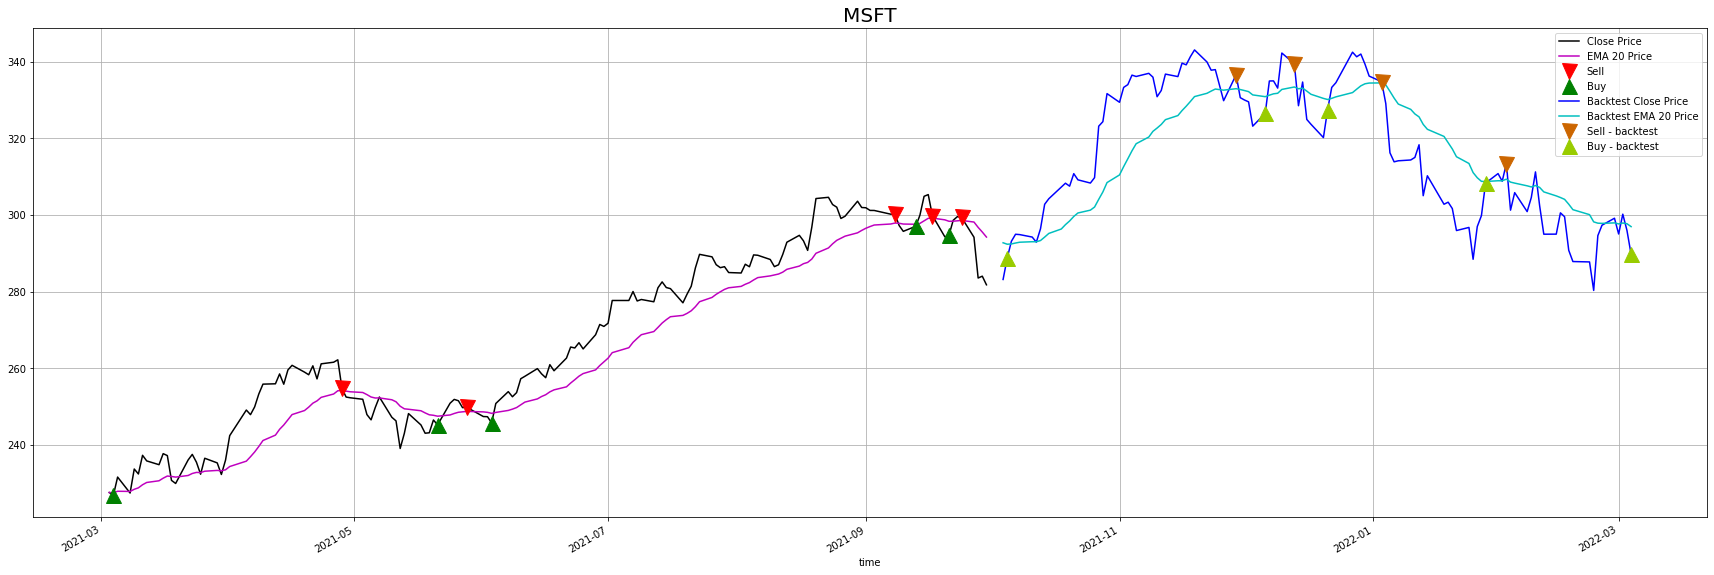

Buy and hold strategy returns for the backtest: 0.4%
EMA based model strategy returns for the backtest: 23.1%


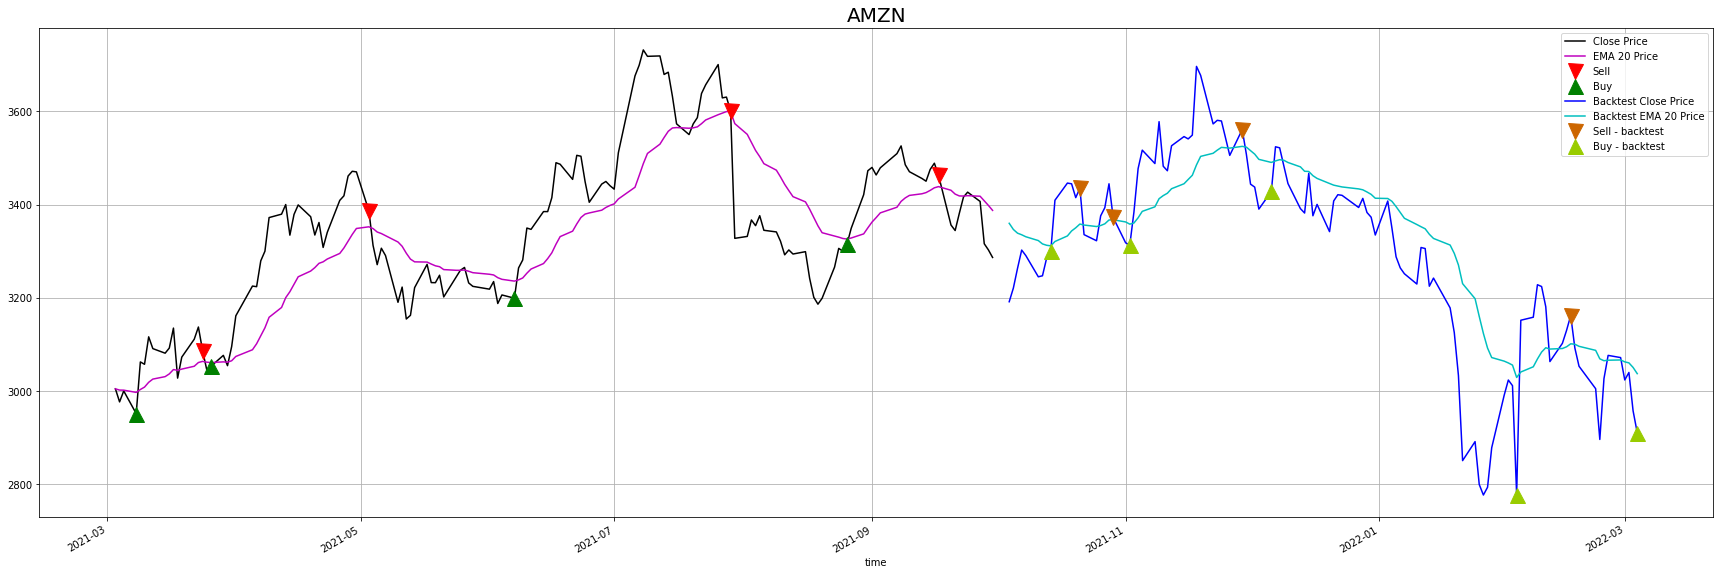

Buy and hold strategy returns for the backtest: -12.1%
EMA based model strategy returns for the backtest: 3.0%


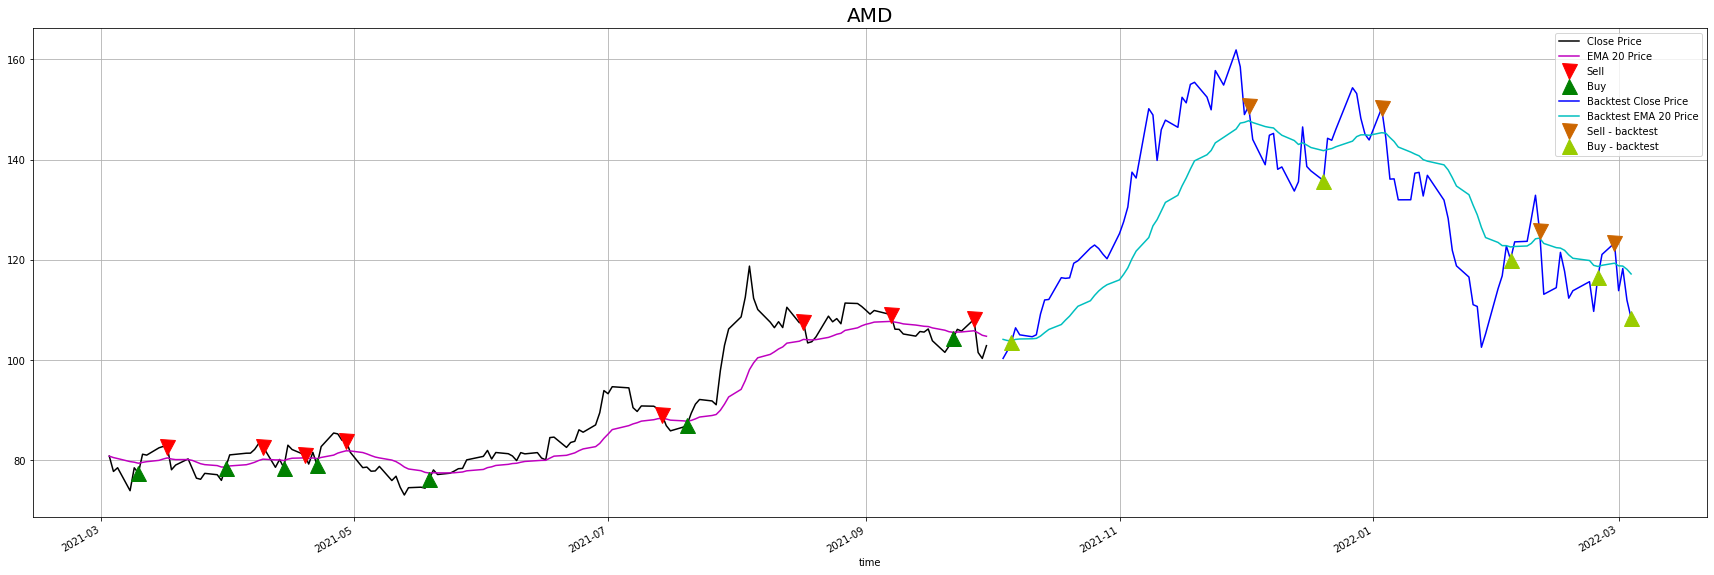

Buy and hold strategy returns for the backtest: 5.7%
EMA based model strategy returns for the backtest: 57.8%


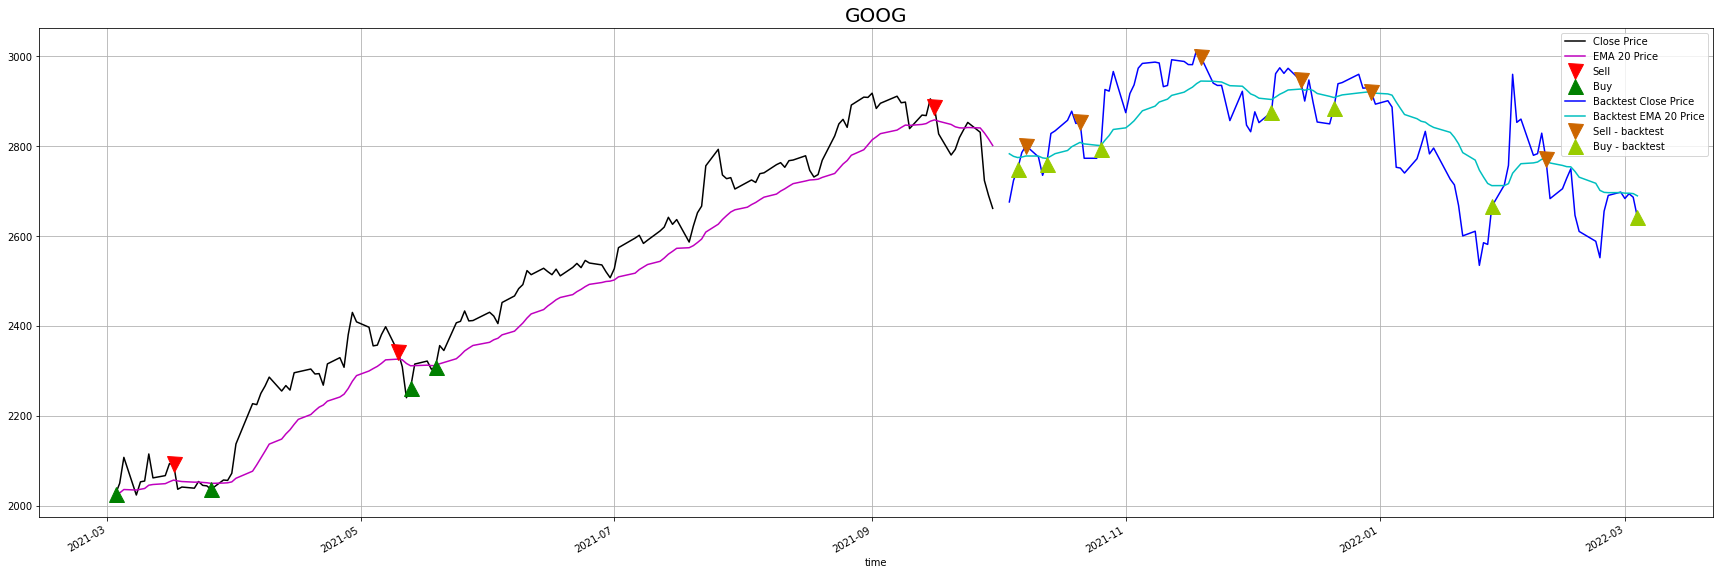

Buy and hold strategy returns for the backtest: -2.9%
EMA based model strategy returns for the backtest: 19.8%


In [4]:
for ticker in ["FB","MSFT","AMZN","AMD","GOOG"]:
    df= client. get_closing_price(ticker,255)
    ema_instance = ema.ExponentialMovingAverageStrategy(df=df,ticker=ticker) 
    test, pred_label=ema_instance.generate_train_model(ticker=ticker)  
    print(f'Buy and hold strategy returns for the backtest: {(test["daily_profit"].sum()*100).round(3)}%')
    print(f'EMA based model strategy returns for the backtest: {(test["strategy_profit"].sum()*100).round(3)}%') 



C:\Python38\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:8: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:8: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


!pip install PyYAML==5.4.1 --ignore-installed
Profit based on STL ML at last 5 months: 16.02%


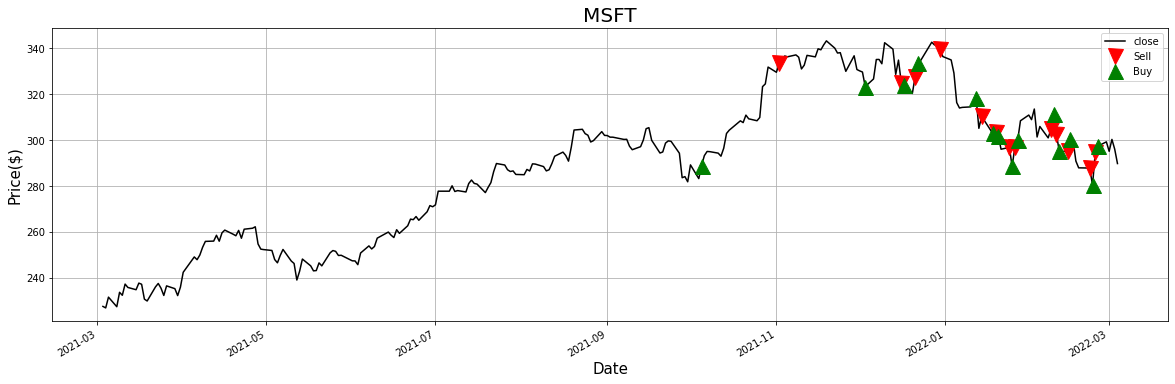

Profit based on STL ML at last 5 months: 20.74%


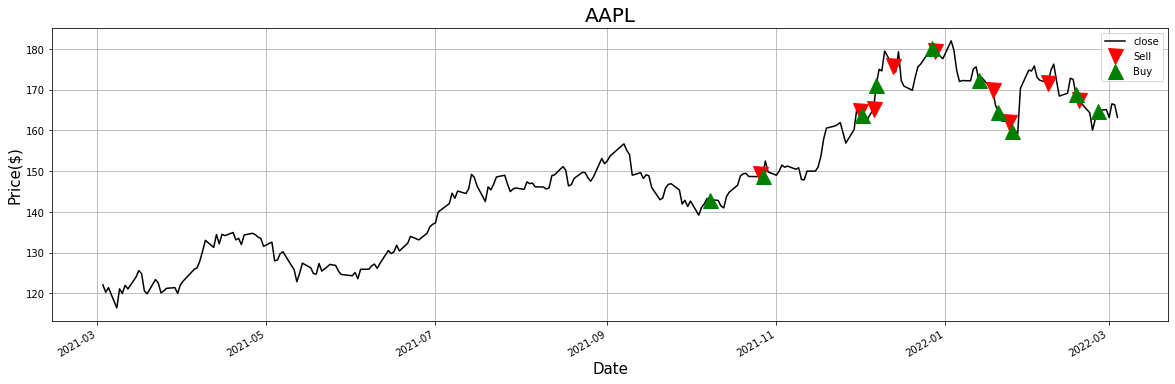

Profit based on STL ML at last 5 months: 9.41%


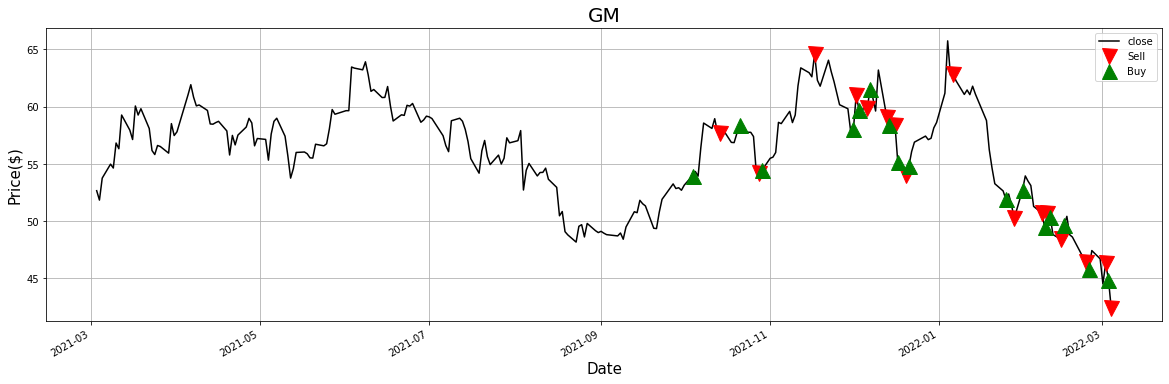

Profit based on STL ML at last 5 months: 15.14%


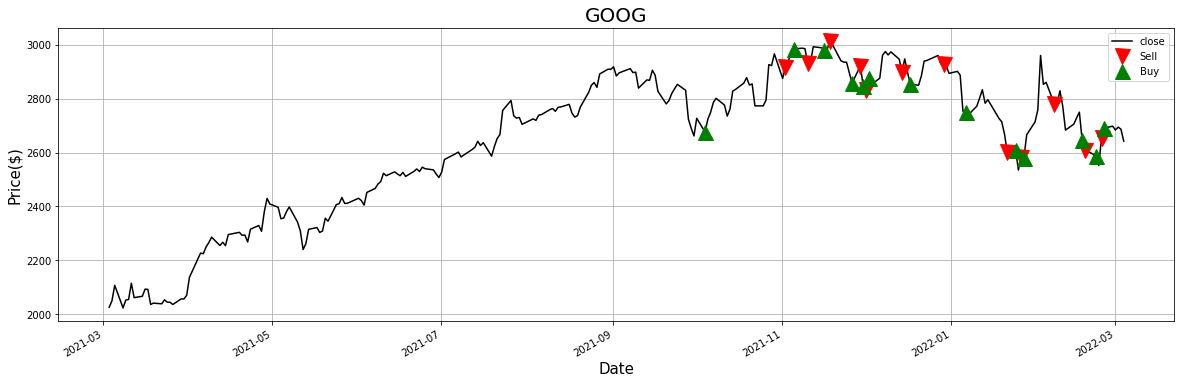

Profit based on STL ML at last 5 months: 11.45%


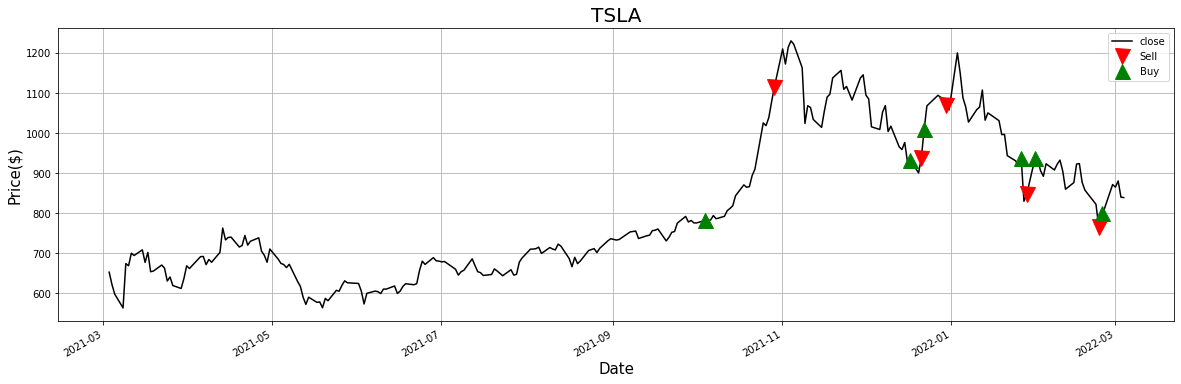

totl profit:72.76%


In [5]:
total = 0.0
from STL.StlMl import STL_strategy
for s,ticker in enumerate([ "MSFT","AAPL","GM","GOOG","TSLA"]):
    df= client.get_closing_price(ticker,255)
    df.index=pd.to_datetime(df.index,utc=True)
    stl = STL_strategy(ticker,df,'close',10,3)  
    total += stl.backtest()
print('totl profit:{:.2f}%'.format(total*100))

# Running Paper trading
please uncomment the code below for running the trade job

In [6]:
p = pTrader.PaperTrader( API_KEY_ID=Api_Key,SECRET_KEY=Secret_Key,model='ema')
p.run_trading()

Starting trading MSFT
Finishing trading MSFT
Starting trading GOOG
Finishing trading GOOG
Starting trading NFLX
Finishing trading NFLX
Starting trading AMD
Finishing trading AMD
Starting trading FB
Finishing trading FB
